# 9.2 Bayesian Inference

## The Bayesian Philosophy

**Bayesian inference** treats parameters as random variables with probability distributions, unlike MLE which treats them as fixed unknown values.

### Key Difference from MLE

- **MLE (Frequentist)**: Parameter θ is fixed but unknown; estimate it from data
- **Bayesian**: Parameter θ is a random variable; update beliefs about θ given data

## Bayes' Theorem for Parameters

### The Fundamental Formula

Given data \(x_1, \ldots, x_n\) and parameter θ:

$$
p(\theta \mid x_1, \ldots, x_n) = \frac{p(x_1, \ldots, x_n \mid \theta) \cdot p(\theta)}{p(x_1, \ldots, x_n)}
$$

**Components:**

- **Posterior**: \(p(\theta \mid x_1, \ldots, x_n)\) - Updated belief about θ after seeing data
- **Likelihood**: \(p(x_1, \ldots, x_n \mid \theta)\) - Probability of data given θ
- **Prior**: \(p(\theta)\) - Initial belief about θ before seeing data
- **Evidence**: \(p(x_1, \ldots, x_n)\) - Marginal probability of data (normalizing constant)

### Simplified Form

Since the evidence is just a normalizing constant:

$$
p(\theta \mid \text{data}) \propto p(\text{data} \mid \theta) \cdot p(\theta)
$$

Or more intuitively:

$$
\text{Posterior} \propto \text{Likelihood} \times \text{Prior}
$$

## Example 1: Coin Flipping (Beta-Binomial)

### Problem Setup

Estimate probability \(p\) of heads from \(n\) coin flips with \(k\) heads observed.

### Bayesian Solution

**Prior**: Beta distribution (common choice for probabilities)

$$
p(p) = \text{Beta}(\alpha, \beta) = \frac{p^{\alpha-1}(1-p)^{\beta-1}}{B(\alpha, \beta)}
$$

where \(B(\alpha, \beta)\) is the Beta function.

**Likelihood**: Binomial

$$
p(k \mid p, n) = \binom{n}{k} p^k (1-p)^{n-k}
$$

**Posterior**: Also Beta! (conjugate prior)

$$
p(p \mid k, n) = \text{Beta}(\alpha + k, \beta + n - k)
$$

**Interpretation**:
- \(\alpha\) = prior "pseudo-counts" of heads
- \(\beta\) = prior "pseudo-counts" of tails
- Data adds \(k\) heads and \(n-k\) tails to these counts

### Python Implementation

Bayesian Coin Flipping Example
True p: 0.7
Data: 14 heads in 20 flips



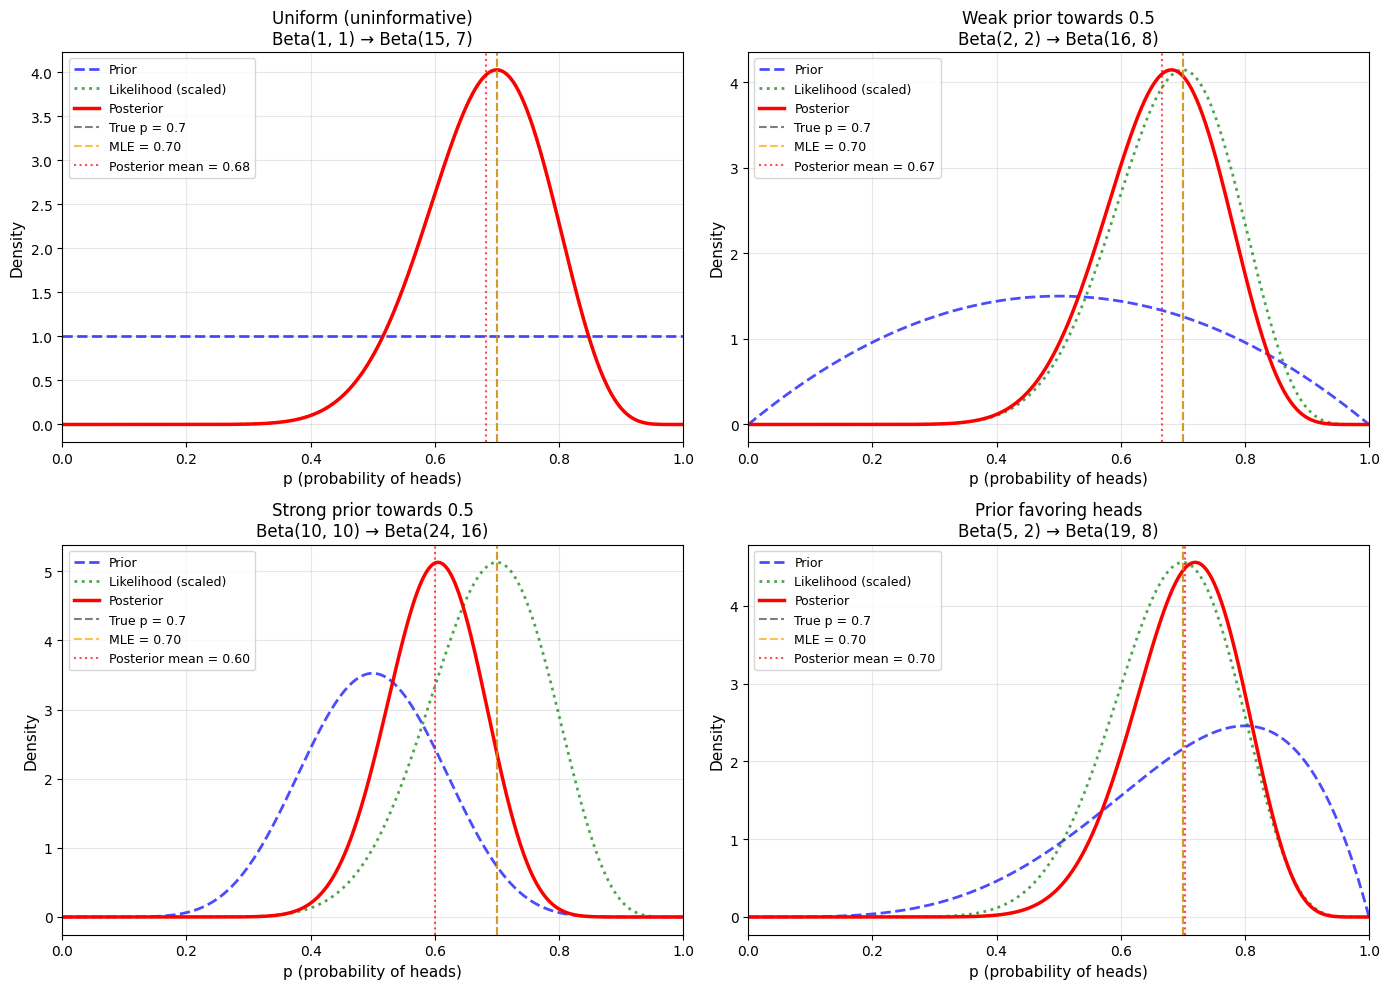


Posterior Statistics:

Uniform (uninformative):
  Posterior: Beta(15, 7)
  Mean: 0.682
  Mode: 0.700
  Std: 0.097

Weak prior towards 0.5:
  Posterior: Beta(16, 8)
  Mean: 0.667
  Mode: 0.682
  Std: 0.094

Strong prior towards 0.5:
  Posterior: Beta(24, 16)
  Mean: 0.600
  Mode: 0.605
  Std: 0.077

Prior favoring heads:
  Posterior: Beta(19, 8)
  Mean: 0.704
  Mode: 0.720
  Std: 0.086


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# Generate data
true_p = 0.7
n_flips = 20
flips = np.random.binomial(1, true_p, n_flips)
k = np.sum(flips)

print("Bayesian Coin Flipping Example")
print("="*70)
print(f"True p: {true_p}")
print(f"Data: {k} heads in {n_flips} flips")
print()

# Different priors
priors = [
    (1, 1, "Uniform (uninformative)"),
    (2, 2, "Weak prior towards 0.5"),
    (10, 10, "Strong prior towards 0.5"),
    (5, 2, "Prior favoring heads")
]

p_range = np.linspace(0, 1, 1000)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, (alpha, beta, label) in enumerate(priors):
    ax = axes[idx]
    
    # Prior distribution
    prior_dist = stats.beta(alpha, beta)
    prior_pdf = prior_dist.pdf(p_range)
    
    # Posterior distribution
    posterior_alpha = alpha + k
    posterior_beta = beta + (n_flips - k)
    posterior_dist = stats.beta(posterior_alpha, posterior_beta)
    posterior_pdf = posterior_dist.pdf(p_range)
    
    # Likelihood (normalized for plotting)
    likelihood = p_range**k * (1-p_range)**(n_flips-k)
    likelihood = likelihood / np.max(likelihood) * np.max(posterior_pdf)
    
    # Plot
    ax.plot(p_range, prior_pdf, 'b--', linewidth=2, label='Prior', alpha=0.7)
    ax.plot(p_range, likelihood, 'g:', linewidth=2, label='Likelihood (scaled)', alpha=0.7)
    ax.plot(p_range, posterior_pdf, 'r-', linewidth=2.5, label='Posterior')
    ax.axvline(true_p, color='black', linestyle='--', linewidth=1.5, 
               label=f'True p = {true_p}', alpha=0.5)
    
    # MLE for comparison
    p_mle = k / n_flips
    ax.axvline(p_mle, color='orange', linestyle='--', linewidth=1.5,
               label=f'MLE = {p_mle:.2f}', alpha=0.7)
    
    # Posterior mean
    post_mean = posterior_alpha / (posterior_alpha + posterior_beta)
    ax.axvline(post_mean, color='red', linestyle=':', linewidth=1.5,
               label=f'Posterior mean = {post_mean:.2f}', alpha=0.7)
    
    ax.set_xlabel('p (probability of heads)', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'{label}\nBeta({alpha}, {beta}) → Beta({posterior_alpha}, {posterior_beta})',
                 fontsize=12)
    ax.legend(fontsize=9, loc='upper left')
    ax.grid(alpha=0.3)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.savefig('bayesian_coin_priors.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPosterior Statistics:")
for alpha, beta, label in priors:
    post_alpha = alpha + k
    post_beta = beta + (n_flips - k)
    post_mean = post_alpha / (post_alpha + post_beta)
    post_mode = (post_alpha - 1) / (post_alpha + post_beta - 2)
    post_var = (post_alpha * post_beta) / ((post_alpha + post_beta)**2 * (post_alpha + post_beta + 1))
    
    print(f"\n{label}:")
    print(f"  Posterior: Beta({post_alpha}, {post_beta})")
    print(f"  Mean: {post_mean:.3f}")
    print(f"  Mode: {post_mode:.3f}")
    print(f"  Std: {np.sqrt(post_var):.3f}")

## Credible Intervals

### Definition

A **95% credible interval** \([a, b]\) satisfies:

$$
P(a \leq \theta \leq b \mid \text{data}) = 0.95
$$

**Interpretation**: "There is a 95% probability that θ lies in \([a, b]\) given the data we observed."

### Credible Intervals vs. Confidence Intervals

**Credible Interval (Bayesian)**:
- Direct probability statement about the parameter
- "θ has 95% probability of being in this interval"

**Confidence Interval (Frequentist)**:
- Statement about the procedure, not the parameter
- "If we repeat this procedure many times, 95% of intervals will contain the true θ"

### Computing Credible Intervals

In [2]:
import numpy as np
from scipy import stats

# Continuing from previous example
alpha, beta = 1, 1  # Uniform prior
k, n_flips = 14, 20  # Observed data

# Posterior
post_alpha = alpha + k
post_beta = beta + (n_flips - k)
posterior = stats.beta(post_alpha, post_beta)

print("Credible Intervals")
print("="*70)

# Equal-tailed 95% credible interval
lower = posterior.ppf(0.025)
upper = posterior.ppf(0.975)
print(f"\n95% Equal-tailed credible interval: [{lower:.3f}, {upper:.3f}]")

# Highest Posterior Density (HPD) interval
# For unimodal symmetric distributions, similar to equal-tailed
print(f"\nInterpretation: Given the data, there is a 95% probability")
print(f"that the true probability of heads is between {lower:.3f} and {upper:.3f}")

# Compare with frequentist confidence interval
p_mle = k / n_flips
se = np.sqrt(p_mle * (1 - p_mle) / n_flips)
ci_lower = p_mle - 1.96 * se
ci_upper = p_mle + 1.96 * se

print(f"\n95% Frequentist confidence interval: [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"\nNote: These are often numerically similar but have different interpretations!")

Credible Intervals

95% Equal-tailed credible interval: [0.478, 0.854]

Interpretation: Given the data, there is a 95% probability
that the true probability of heads is between 0.478 and 0.854

95% Frequentist confidence interval: [0.499, 0.901]

Note: These are often numerically similar but have different interpretations!


## Prior Selection

### Types of Priors

**1. Informative Prior**: Incorporates specific prior knowledge

$$
p = \text{Beta}(20, 5) \quad \text{(strong belief that } p \approx 0.8\text{)}
$$

**2. Weakly Informative Prior**: General shape but not too strong

$$
p = \text{Beta}(2, 2) \quad \text{(weak preference for } p \approx 0.5\text{)}
$$

**3. Non-informative (Uniform) Prior**: No prior knowledge

$$
p = \text{Beta}(1, 1) = \text{Uniform}(0, 1)
$$

### Choosing Priors

**Guidelines**:
1. Use domain knowledge when available
2. Check sensitivity: Try different priors, see if conclusions change
3. With large data, prior becomes less important
4. Document your choice and reasoning

## Sequential Updating

### Bayesian Learning

One beautiful property: **today's posterior = tomorrow's prior**

$$
\text{Prior}_1 \xrightarrow{\text{Data}_1} \text{Posterior}_1 = \text{Prior}_2 \xrightarrow{\text{Data}_2} \text{Posterior}_2
$$

### Example: Sequential Coin Flips

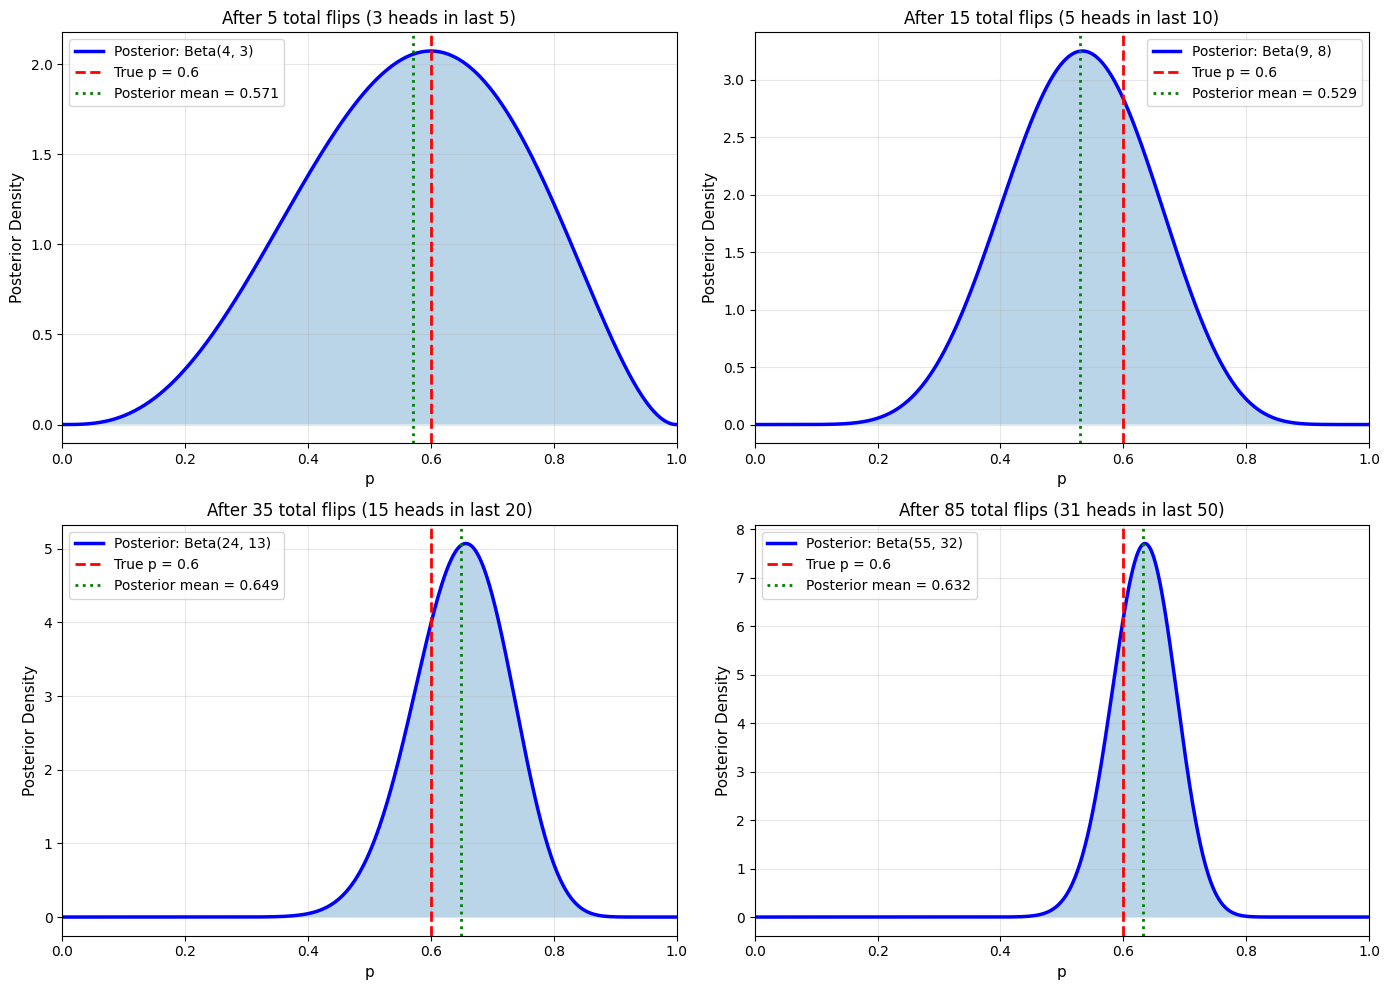


Sequential Bayesian Updating
Final posterior after all data: Beta(55, 32)
Posterior mean: 0.632
True p: 0.6


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# True parameter
true_p = 0.6

# Start with uniform prior
alpha, beta = 1, 1

# Generate data in batches
batch_sizes = [5, 10, 20, 50]
p_range = np.linspace(0, 1, 1000)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, n_new in enumerate(batch_sizes):
    # Generate new data
    new_flips = np.random.binomial(1, true_p, n_new)
    k_new = np.sum(new_flips)
    
    # Update posterior
    alpha += k_new
    beta += (n_new - k_new)
    
    # Current posterior
    posterior = stats.beta(alpha, beta)
    
    ax = axes[idx]
    ax.plot(p_range, posterior.pdf(p_range), 'b-', linewidth=2.5, 
            label=f'Posterior: Beta({alpha}, {beta})')
    ax.axvline(true_p, color='red', linestyle='--', linewidth=2,
               label=f'True p = {true_p}')
    
    post_mean = alpha / (alpha + beta)
    ax.axvline(post_mean, color='green', linestyle=':', linewidth=2,
               label=f'Posterior mean = {post_mean:.3f}')
    
    ax.fill_between(p_range, posterior.pdf(p_range), alpha=0.3)
    
    total_flips = alpha + beta - 2  # Subtract initial prior counts
    ax.set_xlabel('p', fontsize=11)
    ax.set_ylabel('Posterior Density', fontsize=11)
    ax.set_title(f'After {total_flips} total flips ({k_new} heads in last {n_new})',
                 fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.savefig('sequential_updating.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nSequential Bayesian Updating")
print("="*70)
print(f"Final posterior after all data: Beta({alpha}, {beta})")
print(f"Posterior mean: {alpha / (alpha + beta):.3f}")
print(f"True p: {true_p}")


## Posterior Predictive Distribution

### Definition

Predict **new data** \(\tilde{x}\) given observed data:

$$
p(\tilde{x} \mid x_1, \ldots, x_n) = \int p(\tilde{x} \mid \theta) \cdot p(\theta \mid x_1, \ldots, x_n) \, d\theta
$$

**Interpretation**: Average predictions over all possible parameter values, weighted by their posterior probability.

### Example: Predicting Next Coin Flip

In [4]:
import numpy as np
from scipy import stats

# Observed data: 7 heads in 10 flips
alpha_prior, beta_prior = 1, 1
k, n = 7, 10

# Posterior
alpha_post = alpha_prior + k
beta_post = beta_prior + (n - k)

print("Posterior Predictive Distribution")
print("="*70)
print(f"\nObserved: {k} heads in {n} flips")
print(f"Posterior: Beta({alpha_post}, {beta_post})")
print()

# Probability that next flip is heads
# For Beta-Binomial, this has a closed form:
prob_heads = alpha_post / (alpha_post + beta_post)

print(f"Predicted probability of heads on next flip: {prob_heads:.3f}")
print(f"\n(Compare to MLE: {k/n:.3f})")
print(f"\nNote: Bayesian prediction accounts for uncertainty in p!")

Posterior Predictive Distribution

Observed: 7 heads in 10 flips
Posterior: Beta(8, 4)

Predicted probability of heads on next flip: 0.667

(Compare to MLE: 0.700)

Note: Bayesian prediction accounts for uncertainty in p!


## Summary

### Key Concepts

**Bayes' Theorem**:

$$
p(\theta \mid \text{data}) = \frac{p(\text{data} \mid \theta) \cdot p(\theta)}{p(\text{data})}
$$

**Posterior ∝ Likelihood × Prior**

### Advantages of Bayesian Inference

✅ Incorporates prior knowledge
✅ Provides full distribution over parameters
✅ Natural sequential updating
✅ Direct probability statements
✅ Automatic regularization (via prior)

### Challenges

❌ Requires prior specification
❌ Computational complexity (often needs MCMC)
❌ Sensitive to prior with small data
❌ More conceptually complex

### When to Use Bayesian vs. MLE

**Use Bayesian when**:
- You have good prior information
- You want uncertainty quantification
- Small sample sizes
- Sequential learning is important

**Use MLE when**:
- Large sample sizes
- No prior information
- Computational simplicity needed
- Standard errors are sufficient